# Text Classification Project

### Dataset: Given a set of text movie reviews that have been labeled negative or positive

Link : http://ai.stanford.edu/~amaas/data/sentiment/


In [57]:
import numpy as np
import pandas as pd

In [59]:
df = pd.read_csv('moviereviews.csv')

In [42]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [43]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [44]:
df = df.dropna()

#### Checking for Empty spaces in review column

In [45]:
df['review'].str.isspace().sum()

27

In [46]:
df[df['review'].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1965 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 46.1+ KB


In [48]:
df['label'].value_counts()

neg    983
pos    982
Name: label, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [51]:
#create pipe object
pipe = Pipeline([('tfidf', TfidfVectorizer()),('svc', LinearSVC()),])

In [52]:
# Feed the training data through the pipeline
pipe.fit(X_train, y_train)  

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('svc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

#### Metrics

In [53]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [54]:
preds = pipe.predict(X_test)

In [55]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         neg       0.82      0.83      0.83       188
         pos       0.84      0.83      0.84       205

    accuracy                           0.83       393
   macro avg       0.83      0.83      0.83       393
weighted avg       0.83      0.83      0.83       393



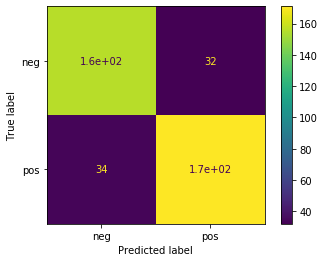

In [56]:
plot_confusion_matrix(pipe,X_test,y_test)